In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('weather.csv')

In [2]:
# Convert temperature columns (temp and dewp) to Celsius
df['temp'] = np.round((df['temp'] - 32) * 5/9, 2)
df['dewp'] = np.round((df['dewp'] - 32) * 5/9, 2)

# Convert precip to millimeters
df['precip'] = np.round(df['precip'] * 25.4, 2)

# Convert visib to meters
df['visib'] = np.round(df['visib'] * 1609.34, 2)

# Convert wind_speed and wind_gust to meters per second
df['wind_speed'] = np.round(df['wind_speed'] * 0.44704, 2)
df['wind_gust'] = np.round(df['wind_gust'] * 0.44704, 2)

# Print the first few rows of the modified DataFrame
print(df.head())

# Save the modified DataFrame back to the CSV file
df.to_csv('new_weather.csv', index=False)

  origin  year  month  day  hour  temp  dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0   2.8  -5.6  53.97     230.0        4.63   
1    EWR  2013      1    1     1   2.8  -5.6  53.97     230.0        6.17   
2    EWR  2013      1    1     2   3.3  -5.6  52.09     230.0        5.66   
3    EWR  2013      1    1     3   3.3  -5.0  54.51     230.0        6.17   
4    EWR  2013      1    1     4   3.3  -4.4  57.04     240.0        6.69   

   wind_gust  precip  pressure    visib       time_hour  
0       5.33     0.0    1013.9  16093.4  1/01/2013 1:00  
1       7.10     0.0    1013.0  16093.4  1/01/2013 2:00  
2       6.51     0.0    1012.6  16093.4  1/01/2013 3:00  
3       7.10     0.0    1012.7  16093.4  1/01/2013 4:00  
4       7.70     0.0    1012.8  16093.4  1/01/2013 5:00  


I convert all the required parameters and save them to the new_weather.csv file.

In [3]:
# Filter data for LGA airport
lga_data = df[df['origin'] == 'LGA']

# Group by year, month, and day, and calculate the mean wind speed for each day
daily_mean_wind_speed = lga_data.groupby(['year', 'month', 'day'])['wind_speed'].mean().reset_index()

# Print the resulting DataFrame
print(daily_mean_wind_speed.head())

   year  month  day  wind_speed
0  2013      1    1    6.687391
1  2013      1    2    6.430417
2  2013      1    3    4.908750
3  2013      1    4    6.881250
4  2013      1    5    5.143750


The wind speed used data from previous calculations to calculate the mean wind speed.

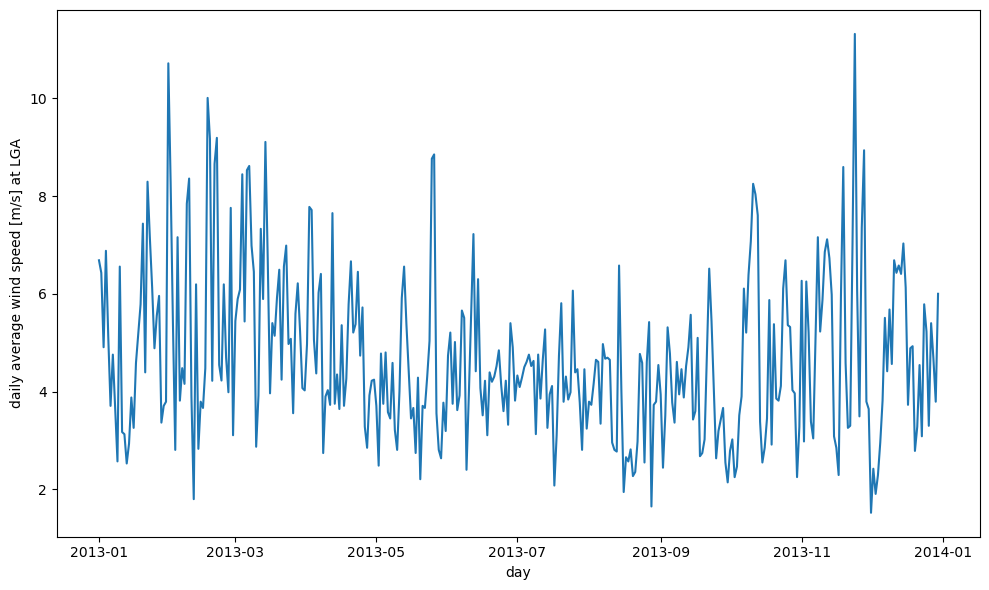

In [4]:
# Convert 'year', 'month', 'day' columns to datetime format
daily_mean_wind_speed['date'] = pd.to_datetime(daily_mean_wind_speed[['year', 'month', 'day']])

# Set the date column as the index
daily_mean_wind_speed.set_index('date', inplace=True)

# Plot the daily mean wind speeds
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_wind_speed.index, daily_mean_wind_speed['wind_speed'], linestyle='-')

# Customize the plot
plt.xlabel('day')
plt.ylabel('daily average wind speed [m/s] at LGA')

# Show the plot
plt.tight_layout()
plt.show()

I convert and set date column for index to make the xlabel for plot.

In [65]:
# Find the ten windiest days at LGA
top_10_windiest_days = daily_mean_wind_speed.nlargest(10, 'wind_speed')

# Print the result
print(top_10_windiest_days[['wind_speed']])

            wind_speed
date                  
2013-11-24   11.318750
2013-01-31   10.717500
2013-02-17   10.010000
2013-02-21    9.192609
2013-02-18    9.173750
2013-03-14    9.109167
2013-11-28    8.938333
2013-05-26    8.853750
2013-05-25    8.766667
2013-02-20    8.660833


I use the nlargest function in pandas to find the largest values in the 'wind_speed' column.

In [79]:
# Compute monthly mean wind speeds for all three airports
monthly_mean_wind_speeds = np.round(df.groupby(['year', 'month', 'origin'])['wind_speed'].mean().reset_index(), 2)

# Find the index of the outlier for EWR
max_index = monthly_mean_wind_speeds.loc[monthly_mean_wind_speeds['origin'] == 'EWR', 'wind_speed'].idxmax()

# Replace the outlier with np.nan
monthly_mean_wind_speeds.at[max_index, 'wind_speed'] = np.nan

#max_index = monthly_mean_wind_speeds.loc[monthly_mean_wind_speeds['origin'] == 'EWR', 'wind_speed'].idxmax()

# Find and replace outliers with np.nan
#monthly_mean_wind_speeds.loc[monthly_mean_wind_speeds['wind_speed'] > outlier_threshold, 'wind_speed'] = np.nan

# Print the result
print(monthly_mean_wind_speeds)

    year  month origin  wind_speed
0   2013      1    EWR        4.33
1   2013      1    JFK        5.38
2   2013      1    LGA        5.07
3   2013      2    EWR         NaN
4   2013      2    JFK        5.95
5   2013      2    LGA        5.52
6   2013      3    EWR        5.14
7   2013      3    JFK        6.21
8   2013      3    LGA        5.85
9   2013      4    EWR        4.27
10  2013      4    JFK        5.58
11  2013      4    LGA        4.93
12  2013      5    EWR        3.71
13  2013      5    JFK        4.60
14  2013      5    LGA        4.20
15  2013      6    EWR        4.20
16  2013      6    JFK        4.88
17  2013      6    LGA        4.46
18  2013      7    EWR        4.02
19  2013      7    JFK        4.50
20  2013      7    LGA        4.18
21  2013      8    EWR        3.35
22  2013      8    JFK        4.31
23  2013      8    LGA        3.73
24  2013      9    EWR        3.57
25  2013      9    JFK        4.36
26  2013      9    LGA        3.93
27  2013     10    E

I calculate the monthly mean wind speeds for all three airports. Following that, I find an idmax for EWR and replace it with NaN because there is one obvious outlier amongst the observed wind speeds.

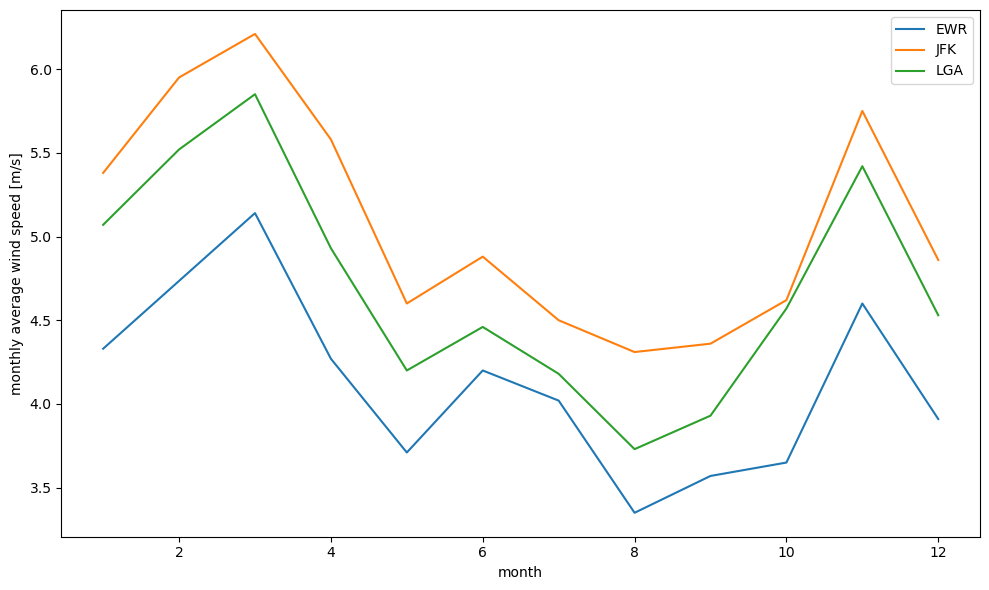

In [88]:
# Pivot the table to have columns for each airport
monthly_mean_wind_speeds_pivot = monthly_mean_wind_speeds.pivot(index='month', columns='origin', values='wind_speed')

# Interpolate NaN values
monthly_mean_wind_speeds_pivot.interpolate(method='linear', axis=0, inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
for airport in monthly_mean_wind_speeds_pivot.columns:
    plt.plot(monthly_mean_wind_speeds_pivot.index, monthly_mean_wind_speeds_pivot[airport], label=airport)

# Customize the plot
plt.xlabel('month')
plt.ylabel('monthly average wind speed [m/s]')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

I make pivots for each airport and draw the monthly mean wind speeds for the three airports. The interpolate method is used to fill NaN values with interpolated values.